# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
# Your code here :
from sklearn.model_selection import train_test_split
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape[0]} samples")
print(f"Test  size: {X_test.shape[0]} samples")

Train size: 404 samples
Test  size: 102 samples


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
# Your code here :
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred  = lr.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [7]:
# Your code here :
# R² on training data
r2_train = lr.score(X_train, y_train)

# R² on test data
r2_test  = lr.score(X_test,  y_test)

print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")


R² (train): 0.751
R² (test) : 0.669


## 4. Calculate and print mean squared error for both the training and the testing set.

In [8]:
# Your code here :
from sklearn.metrics import mean_squared_error

# MSE on training data
mse_train = mean_squared_error(y_train, y_train_pred)
# MSE on test data
mse_test  = mean_squared_error(y_test,  y_test_pred)

print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")

MSE (train): 21.64
MSE (test) : 24.29


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [9]:
# Your code here :
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test  = mean_absolute_error(y_test,  y_test_pred)

print(f"MAE (train): {mae_train:.2f}")
print(f"MAE (test) : {mae_test:.2f}")

MAE (train): 3.31
MAE (test) : 3.19


## Classification Model Evaluation

In [10]:
from sklearn.datasets import load_iris
data = load_iris()

In [11]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [13]:
column_names = data.feature_names
column_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
df = pd.DataFrame(data['data'],columns=column_names)

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
target = pd.DataFrame(data.target)

In [17]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [18]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [20]:
# Your code here :
from sklearn.model_selection import train_test_split

df["class"]=target.squeeze()
X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape[0]} samples")
print(f"Test  size: {X_test.shape[0]} samples")

Train size: 120 samples
Test  size: 30 samples


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
# Your code here :
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression()
log_R.fit(X_train,y_train)

y_train_pred = log_R.predict(X_train)
y_test_pred  = log_R.predict(X_test)

# Cross validation
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(log_R, X_train, y_train, cv=3, scoring="accuracy").mean()
print("3-fold CV accuracy on train:", cv_score)



Accuracy on train set: 0.975
Accuracy on test set:  1.0
3-fold CV accuracy on train: 0.9666666666666667


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [22]:
# Your code here :
print("Accuracy on train set:", log_R.score(X_train, y_train))
print("Accuracy on test set: ", log_R.score(X_test,  y_test))

Accuracy on train set: 0.975
Accuracy on test set:  1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [23]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

bal_acc_train = balanced_accuracy_score(y_train, y_train_pred)
bal_acc_test  = balanced_accuracy_score(y_test,  y_test_pred)

print(f"Balanced Accuracy (train): {bal_acc_train:.3f}")
print(f"Balanced Accuracy (test) : {bal_acc_test:.3f}")

Balanced Accuracy (train): 0.976
Balanced Accuracy (test) : 1.000


## 10. Calculate and print the precision score for both the training and the testing set.

In [33]:
# Your code here :

# Calcultating precision score
from sklearn.metrics import precision_score

# Macro‐average
p_train_macro = precision_score(y_train, y_train_pred, average="macro")
p_test_macro  = precision_score(y_test,  y_test_pred,  average="macro")

print(f"Precision score (Macro‐average for train): {p_train_macro:.3f}")
print(f"Precision score (Macro‐average for test) : {p_test_macro:.3f}")

# Weighted‐average
p_train_w = precision_score(y_train, y_train_pred, average="weighted")
p_test_w  = precision_score(y_test,  y_test_pred,  average="weighted")

print(f"Precision score (Weighted‐average for train): {p_train_w:.3f}")
print(f"Precision score (Weighted‐average for test) : {p_test_w:.3f}")


Precision score (Macro‐average for train): 0.976
Precision score (Macro‐average for test) : 1.000
Precision score (Weighted‐average for train): 0.977
Precision score (Weighted‐average for test) : 1.000


## 11. Calculate and print the recall score for both the training and the testing set.

In [31]:
# Your code here :
from sklearn.metrics import recall_score

# Macro-average recall
rc_train_macro = recall_score(y_train, y_train_pred, average="macro")
rc_test_macro  = recall_score(y_test,  y_test_pred,  average="macro")

print(f"Macro-Recall (train): {rc_train_macro:.3f}")
print(f"Macro-Recall (test) : {rc_test_macro:.3f}")

# Weighted-average recall
rc_train_w = recall_score(y_train, y_train_pred, average="weighted")
rc_test_w  = recall_score(y_test,  y_test_pred,  average="weighted")

print(f"Weighted-Recall (train): {rc_train_w:.3f}")
print(f"Weighted-Recall (test) : {rc_test_w:.3f}")

Macro-Recall (train): 0.976
Macro-Recall (test) : 1.000
Weighted-Recall (train): 0.975
Weighted-Recall (test) : 1.000


## 12. Calculate and print the F1 score for both the training and the testing set.

In [32]:
# Your code here :
from sklearn.metrics import f1_score

# Macro-average recall
f1_train_macro = f1_score(y_train, y_train_pred, average="macro")
f1_test_macro  = f1_score(y_test,  y_test_pred,  average="macro")

print(f"Macro-F1l (train): {f1_train_macro:.3f}")
print(f"Macro-F1 (test) : {f1_test_macro:.3f}")

# Weighted-average recall
f1_train_macro_w = f1_score(y_train, y_train_pred, average="weighted")
f1_test_macro_w  = f1_score(y_test,  y_test_pred,  average="weighted")

print(f"Weighted-F1 (train): {f1_train_macro_w:.3f}")
print(f"Weighted-F1 (test) : {f1_test_macro_w:.3f}")

Macro-F1l (train): 0.975
Macro-F1 (test) : 1.000
Weighted-F1 (train): 0.975
Weighted-F1 (test) : 1.000


## 13. Generate confusion matrices for both the training and the testing set.

Confusion matrix (train set):
 [[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]
Confusion matrix (test set):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


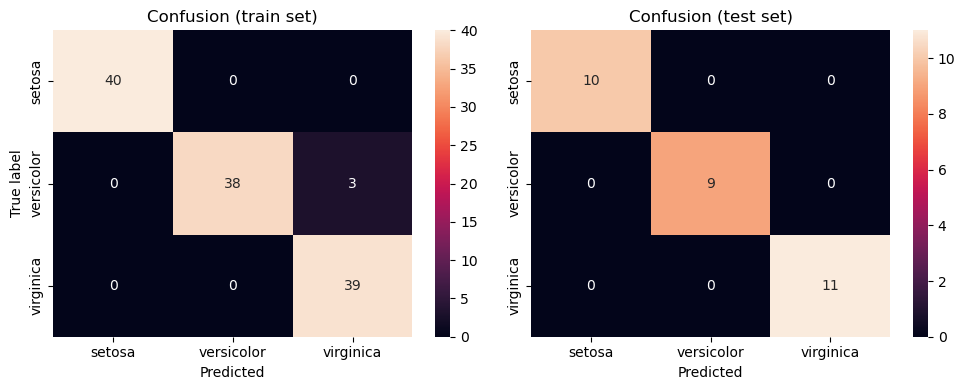

In [35]:
# Your code here :

from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion matrix (train set):\n", cm_train)

cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix (test set):\n", cm_test)

# Vizualization:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(
    cm_train, annot=True, fmt="d",
    xticklabels=data.target_names,
    yticklabels=data.target_names,
    ax=axes[0]
)
axes[0].set_title("Confusion (train set)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True label")

sns.heatmap(
    cm_test, annot=True, fmt="d",
    xticklabels=data.target_names,
    yticklabels=data.target_names,
    ax=axes[1]
)
axes[1].set_title("Confusion (test set)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !